In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D


def plot_all_frames(st, et, spf, azim=120):
    frames = []
    _x = motion[st:et, indices, 0]
    _y = motion[st:et, indices, 1]
    _z = motion[st:et, indices, 2]
    
    for i, t in enumerate(np.arange(len(motion))[st:et:spf]):
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.set_xlim(int(_x.min()-5), int(_x.max()+5))
        ax.set_ylim(int(_z.min()-5), int(_z.max()+5))
        ax.set_zlim(int(_y.min()-5), int(_y.max()+5))

        x = motion[t, indices, 0]
        y = motion[t, indices, 1]
        z = motion[t, indices, 2]
        ax.scatter(x, z, y)

#         x = motion[t, indices2, 0]
#         y = motion[t, indices2, 1]
#         z = motion[t, indices2, 2]
#         ax.scatter(x, z, y, c='r')
        
        ax.view_init(elev=30, azim=azim)

        fig.canvas.draw()
        frame = np.array(fig.canvas.renderer.buffer_rgba())
        frames.append(frame)
        plt.close()

    return frames

In [10]:
from bvh import Bvh
from utils import *
import numpy as np


anim = Bvh()
anim.parse_file("raw/bvh/Scene_10Char00.bvh")
# all_p, all_r = anim.all_frame_poses()
# np.save("raw/npy/motion000-020.npy", all_p)

In [11]:
indices = np.arange(len(anim.joints.keys()))

configs = [
    {"path": "motion000-020.npy", "st": 3840}, # Scene_5
    {"path": "motion020-040.npy", "st": 3550}, # Scene_6
    {"path": "motion040-060.npy", "st": 3550}, # Scene_7
    {"path": "motion060-080.npy", "st": 2400}, # Scene_8
    {"path": "motion080-100.npy", "st": 2760}, # Scene_9
    {"path": "motion100-120.npy", "st": 3720}, # Scene_10
]
spf = 120.5
target_fps = 10.

split_frames = []

for i in range(len(configs)):
    config = configs[i]    
    st = config["st"]
    et = st + spf * 2 ### 2s

    _split_frames = []
    for i in range(20):  # for 20 data
        ### 10s interval
        _split_frames.append([int(st + spf * 10 * i), int(et + spf * 10 * i)])
    split_frames.append(_split_frames)

In [12]:
i = 5
config = configs[i]
motion = np.load("raw/npy/" + config["path"])
# _split_frames = split_frames[i]

# # two finger
# for sf in _split_frames[::5]:
#     f1 = motion[sf[0] : sf[1], 23]
#     f2 = motion[sf[0] : sf[1], 28]
#     l2 = np.power(np.sum(np.power(f1 - f2, 2), axis=1), 0.5)

#     plt.figure(figsize=(3,1)); plt.plot(l2 - l2.mean());
#     plt.plot(f1[:,1] - f1[:,1].mean(), c="r", linestyle=':'); 
#     plt.plot(f2[:,1] - f2[:,1].mean(), c="g", linestyle=':'); 
#     plt.show()

In [13]:
from datetime import datetime

for i, sf in enumerate(_split_frames):
    frames = plot_all_frames(sf[0], sf[1], 4, azim=195)
    npy_to_gif(frames, datetime.now().strftime("gif2/motion{:03}".format(i+200))+".gif")
    break

t:   8%|▊         | 5/62 [00:00<00:01, 44.89it/s, now=None]

MoviePy - Building file gif2/motion200.gif with imageio.


{'path': 'motion000-020.npy', 'st': 3840}


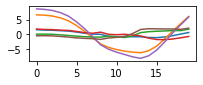

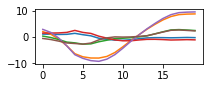

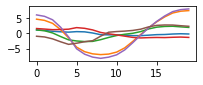

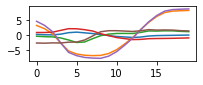

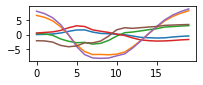

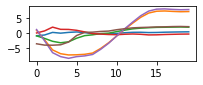

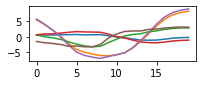

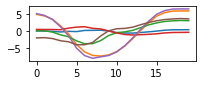

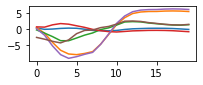

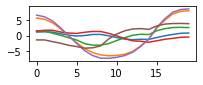

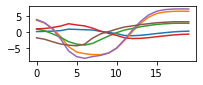

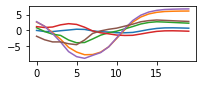

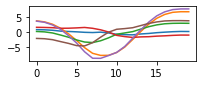

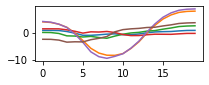

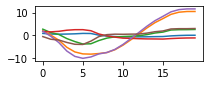

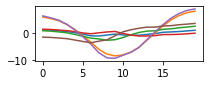

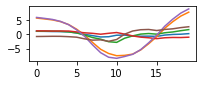

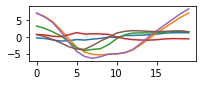

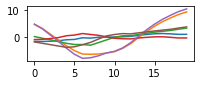

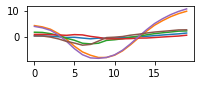

{'path': 'motion020-040.npy', 'st': 3550}


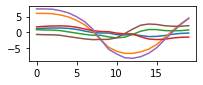

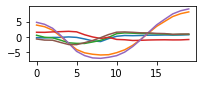

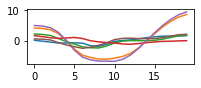

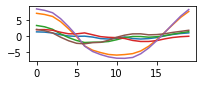

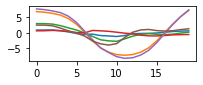

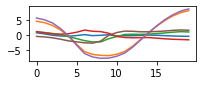

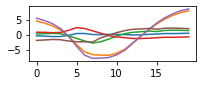

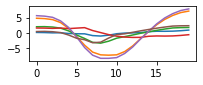

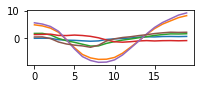

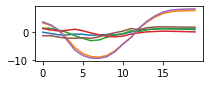

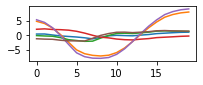

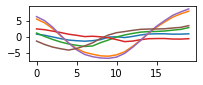

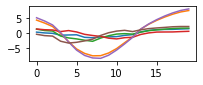

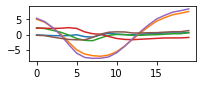

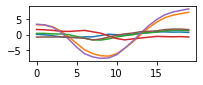

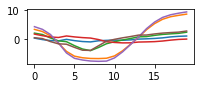

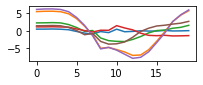

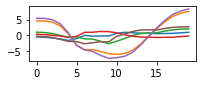

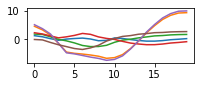

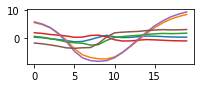

{'path': 'motion040-060.npy', 'st': 3550}


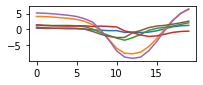

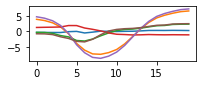

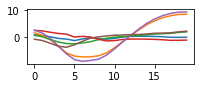

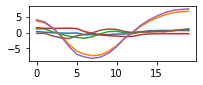

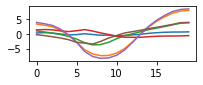

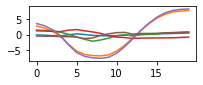

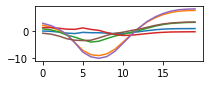

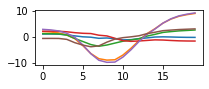

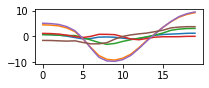

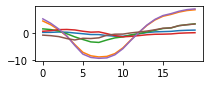

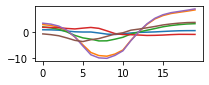

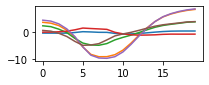

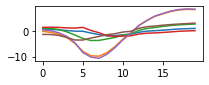

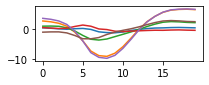

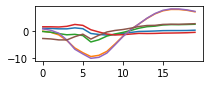

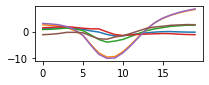

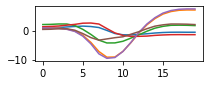

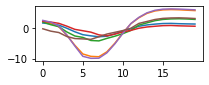

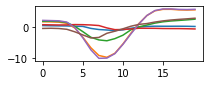

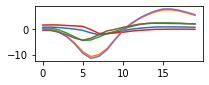

{'path': 'motion060-080.npy', 'st': 2400}


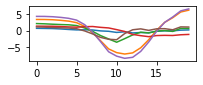

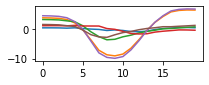

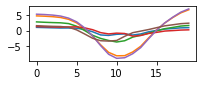

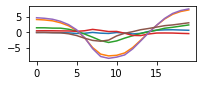

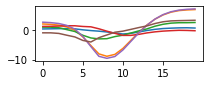

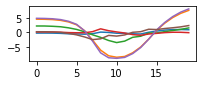

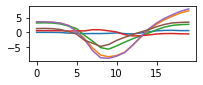

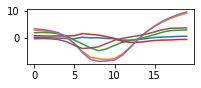

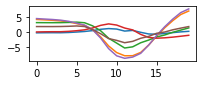

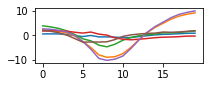

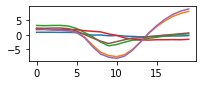

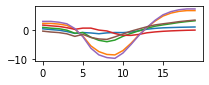

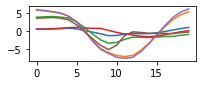

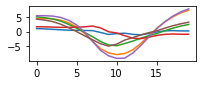

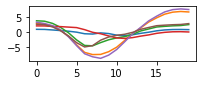

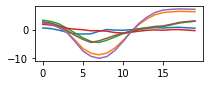

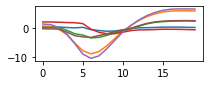

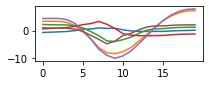

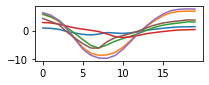

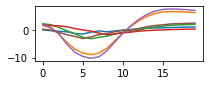

{'path': 'motion080-100.npy', 'st': 2760}


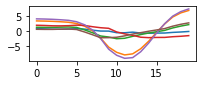

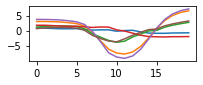

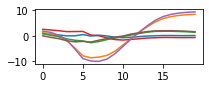

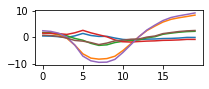

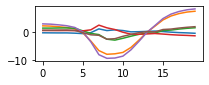

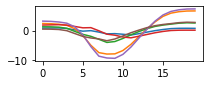

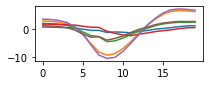

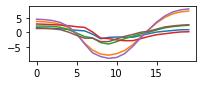

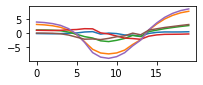

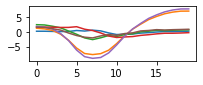

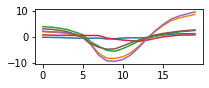

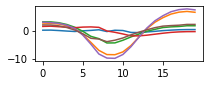

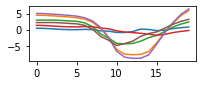

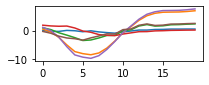

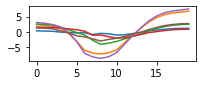

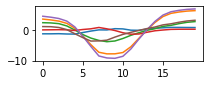

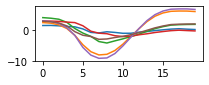

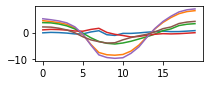

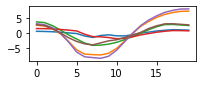

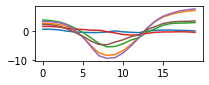

{'path': 'motion100-120.npy', 'st': 3720}


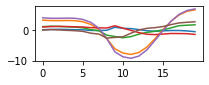

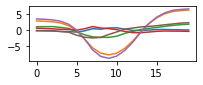

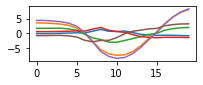

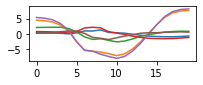

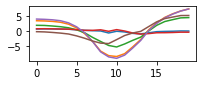

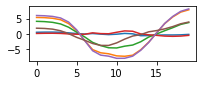

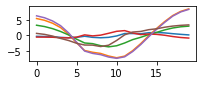

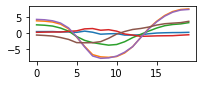

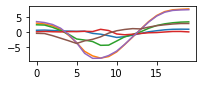

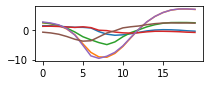

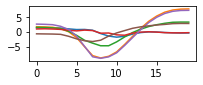

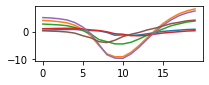

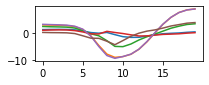

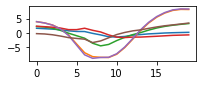

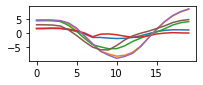

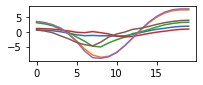

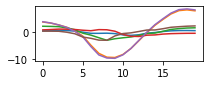

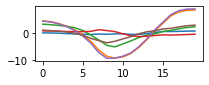

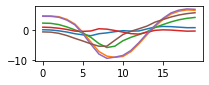

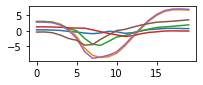

In [8]:
# data (2s, 10fps)
data = []

for i in range(len(configs)):
    config = configs[i]
    print(config)
    motion = np.load("raw/npy/" + config["path"])
    _split_frames = split_frames[i]

    for j, sf in enumerate(_split_frames):
        a = (np.arange(20) * spf / target_fps + sf[0]).astype(np.int)
        f1 = motion[a, 23]
        f2 = motion[a, 28]
        _data = np.concatenate([f1, f2], axis=1)
        data.append(_data)

        # if j % 10 == 0:
        plt.figure(figsize=(3,1))
        plt.plot(_data - _data.mean(axis=0))
        plt.show()

In [7]:
train, test = data[:100], data[100:]
train, test = np.array(train), np.array(test)
print(train.shape, test.shape)
np.save("data/v0_train.npy", train)
np.save("data/v0_test.npy", test)

(100, 20, 6) (20, 20, 6)
